In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt

## Задача

Вычислить вероятность того, что обезьяна напишет слово "абракадабра" на клавиатуре с 40 клавишами.

In [3]:
word = 'абракадабра'
n_keys = 40

# Ваш код здесь

(1 / n_keys) ** len(word)

2.3841857910156264e-18

## Задача

Для бета-распределения с параметрами 1 и 0.1, найти n, для которого распределение средних значений выборок будет похоже на нормальное.

In [ ]:
n = 100
means = np.random.beta(1, 0.1, size=(1000, n)).mean(axis=1)
plt.hist(means)


## Задача 

Человечество изобрело лекарство от рака! Клинические тесты показали, что оно действует с уровнем значимости 0.05, но у лекарства очень плохие побочные эффекты. 

Первая партия лекарства составила 50 млн ампул.

Сколько людей можно было бы спасти, если бы проводимый тест был с уровнем значимости 0.01?

In [2]:
n = 50000000
u = 0.05
better_u = 0.01

(u - better_u) * n

2000000.0

## Задача

Реализовать функцию для подсчета одновыборочного t-критерия Стьюдента

## $T = \frac{a - a_0}{\sigma / \sqrt{df}}$

$df$ - количество степеней свободы и равно $n - 1$

In [3]:
def t_stat(sample_mean, a0, std, df):
    return (sample_mean - a0) / (std / sqrt(df))

## Задача

Сгенерировать две выборки роста людей с одинаковыми дисперсиями и разными матожиданиями (из нормального распределения). 

Опровергнуть гипотезу $H_0$ о том, что матожидания этих распределений равны.

Для решения можно использовать `scipy.stats.ttest_ind`.

Важно: тест работает только для распределений с равными дисперсиями. Можно поставить разные дисперсии и одинаковые матожидания и посмотреть на результаты.

In [16]:
mean1 = 170
mean2 = 175
std = 10
sample1 = np.random.normal(mean1, std, size=100)
sample2 = np.random.normal(mean2, std, size=100)

scipy.stats.ttest_ind(sample1, sample2)

Ttest_indResult(statistic=-3.6109913973709626, pvalue=0.0003865325806368606)

Тест с двусторонней альтернативой, pvalue < 0.05, значит матожидания не равны.

Если бы изначально формулировали гипотезу о том, что матожидание первого распределения меньше, чем матожидание второго распределения, то могли бы доказать и это.

## Задача

Взять данные о погоде (data/weather.csv) и проверить на нормальность распределение первых разностей температуры. Использовать уровень значимости 0.05. Использовать любой критерий для проверки на нормальность.

In [18]:
df = pd.read_csv('data/weather.csv', index_col=0, parse_dates=True)
df.head()

,t
Day,
2008-01-01,0
2008-01-02,-5
2008-01-03,-11
2008-01-04,-11
2008-01-05,-12


Внешне похоже на нормальное распределение

array([[<AxesSubplot:title={'center':'t'}>]], dtype=object)

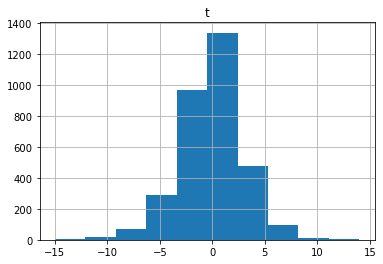

In [21]:
diff_t = df.diff().dropna()
diff_t.hist()

Тест говорит, что распределение не нормальное

In [22]:
scipy.stats.shapiro(diff_t)

ShapiroResult(statistic=0.9792944192886353, pvalue=1.716121890060503e-21)

Нарисуем гистограмму нормального распределения с таким же средним и среднеквадратичным отклонением

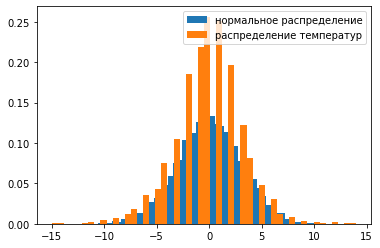

In [28]:
norm_sample = np.random.normal(diff_t.mean(), diff_t.std(), size=10000)
plt.hist(norm_sample, density=True, bins=50)
plt.hist(diff_t.values, density=True, bins=50)
plt.legend(['нормальное распределение', 'распределение температур'])
plt.show()

Как видим, настоящее нормальное распределение менее вытянутое. 

Также для визуальной оценки можно построить [qq-plot](https://habr.com/ru/post/578754/) (функция для построения есть в statsmodels).

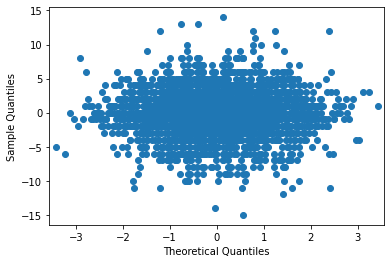

In [33]:
from statsmodels.graphics.gofplots import qqplot
qqplot(diff_t)
plt.show()

Должно быть вот так в случае нормального распределения

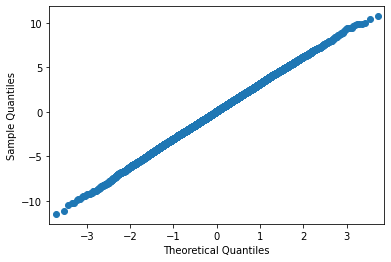

In [36]:
qqplot(norm_sample)
plt.show()